In [16]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
data = pd.read_excel('G:/data/SCUT-FBP5500_v2/All_Ratings.xlsx', None)

In [5]:
data

{'ALL':         Rater   Filename  Rating  original Rating
 0           1    CF1.jpg       3              NaN
 1           1   CF10.jpg       3              NaN
 2           1  CF100.jpg       1              NaN
 3           1  CF101.jpg       2              NaN
 4           1  CF102.jpg       3              NaN
 ...       ...        ...     ...              ...
 329995     60  AM995.jpg       2              NaN
 329996     60  AM996.jpg       2              NaN
 329997     60  AM997.jpg       3              NaN
 329998     60  AM998.jpg       3              NaN
 329999     60  AM999.jpg       2              NaN
 
 [330000 rows x 4 columns],
 'Caucasian_Female':        Rater   Filename  Rating original Rating
 0          1    CF1.jpg       3             NaN
 1          2    CF1.jpg       4               5
 2          3    CF1.jpg       4             NaN
 3          4    CF1.jpg       5             NaN
 4          5    CF1.jpg       4             NaN
 ...      ...        ...     ...     

In [6]:
df_asian = data['Asian_Female']


In [7]:
df_asian.columns

Index(['Rater', 'Filename', 'Rating', 'original Rating'], dtype='object')

In [8]:
df_data = df_asian.groupby('Filename').agg(np.mean)

In [9]:
df_data['file']=df_data.index


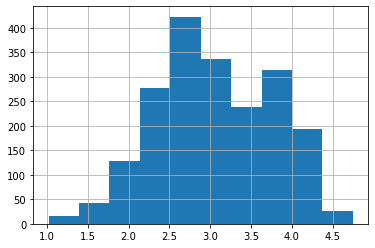

In [12]:
df_data['Rating'].hist()



In [12]:
df_data['file'][0]


'AF1.jpg'

In [13]:
img_path = "G:/data/SCUT-FBP5500_v2/Images/" + df_data['file'][0]

In [15]:
img_data = cv2.imread(img_path)



In [17]:
data_tf = tf.convert_to_tensor(img_data, np.float64)



In [18]:
def read_img(x):
    img_path = "G:/data/SCUT-FBP5500_v2/Images/" + x
    # gray = cv2.cvtColor(img_data, cv2.COLOR_BGR2GRAY)
    # gray = gray.reshape(224, 224, 1)
    # img_data = image.load_img(img_path, target_size=(224, 224))
    # x = image.img_to_array(img_data)
    try:
        data_ts = cv2.imread(img_path)
        # data_tf = tf.convert_to_tensor(img_data, np.float64)
        # data_ts = np.array(data_tf)
    except Exception as e:
        print(e)
        data_ts = None
    return data_ts



In [19]:
df_data['X'] = df_data['file'].apply(read_img)

In [20]:
df_data['X']

Filename
AF1.jpg       [[[255, 255, 255], [255, 255, 255], [255, 255,...
AF10.jpg      [[[255, 255, 255], [255, 255, 255], [255, 255,...
AF100.jpg     [[[255, 255, 255], [255, 255, 255], [255, 255,...
AF1000.jpg    [[[255, 255, 255], [255, 255, 255], [255, 255,...
AF1001.jpg    [[[255, 255, 255], [255, 255, 255], [255, 255,...
                                    ...                        
AF995.jpg     [[[255, 255, 255], [255, 255, 255], [255, 255,...
AF996.jpg     [[[255, 255, 255], [255, 255, 255], [255, 255,...
AF997.jpg     [[[255, 255, 255], [255, 255, 255], [255, 255,...
AF998.jpg     [[[255, 255, 255], [255, 255, 255], [255, 255,...
AF999.jpg     [[[255, 255, 255], [255, 255, 255], [255, 255,...
Name: X, Length: 2000, dtype: object

In [21]:
df_data.dropna(inplace=True)

In [24]:
len(df_data)


2000

In [25]:
X = np.array(df_data['X'].to_list())
Y = np.array(df_data['Rating'].to_list())

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, y_train, x_test, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [29]:
x_train.shape


(1400, 350, 350, 3)

In [30]:
x_test.shape

(1400,)

In [31]:
gen_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="../model/keras_checkpoint.h5")

In [33]:
import autokeras as ak

In [34]:
clf = ak.ImageClassifier()

In [ ]:
clf.fit(X, Y, callbacks=[gen_checkpoint])

Train for 50 steps, validate for 13 steps
Epoch 1/1000
